Activate virtual environment

In [211]:
import pandas as pd

CLEANING DATASET 1

In [212]:
schools_df = pd.read_excel(r'C:\Users\molly\projects\farm_to_school\data\ELSI_excel_export_6389684883881608374860.xls', skiprows=6)


In [213]:
schools_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150007 entries, 0 to 150006
Data columns (total 3 columns):
 #   Column                                            Non-Null Count   Dtype 
---  ------                                            --------------   ----- 
 0   School Name                                       150004 non-null  object
 1   State Name [Public School] Latest available year  150000 non-null  object
 2   State Abbr [Public School] Latest available year  150000 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


In [214]:


schools_df.isna().sum()


School Name                                         3
State Name [Public School] Latest available year    7
State Abbr [Public School] Latest available year    7
dtype: int64

In [215]:
schools_df = schools_df.dropna() #dropping NAs since there aren't that many
schools_df 
schools_df.isna().sum()

School Name                                         0
State Name [Public School] Latest available year    0
State Abbr [Public School] Latest available year    0
dtype: int64

In [216]:
#clean up column names

schools_df.rename(columns={'State Abbr [Public School] Latest available year':'state_abbr'}, inplace=True)
schools_df.rename(columns={'State Name [Public School] Latest available year':'state_name'}, inplace=True)
schools_df.rename(columns={'School Name':'school_name'}, inplace=True)
schools_df

,school_name,state_name,state_abbr
0,014 FRIDLEY TS,Minnesota,MN
1,03-MM,Florida,FL
2,1 LT CHARLES W. WHITCOMB SCHOOL,Massachusetts,MA
3,1 SCHOOL ...,New York,NY
4,100 ACADEMY OF ENGINEERING AND TECHNOLOGY ES,Nevada,NV
...,...,...,...
149995,VAN BUREN COUNTY COMMUNITY SCHOOL DISTRICT HAR...,IOWA,IA
149996,VAN BUREN DISTRICT SECONDARY SCH,Maine,ME
149997,VAN BUREN EARLY COLLEGE HEALTH ALLIANCE,Michigan,MI
149998,VAN BUREN EL,Texas,TX


In [217]:
schools_df.duplicated().sum()
schools_df['school_name'].duplicated().sum()




np.int64(25952)

Discovered many duplicates due to schools having multiple entries based on grades offered

In [218]:
schools_df[schools_df.duplicated()].head(10)

,school_name,state_name,state_abbr
15,118-E-SW-5,FLORIDA,FL
262,601 SCHOOL,California,CA
263,601 SCHOOL,California,CA
284,72 E W 7,FLORIDA,FL
383,A F MALONEY,Massachusetts,MA
396,A J JORDAK ELEMENTARY SCHOOL,Ohio,OH
415,A L P H A CAMPUS,Texas,TX
416,A L P H A CAMPUS,Texas,TX
417,A L P H A CAMPUS,Texas,TX
418,A L P H A CAMPUS,Texas,TX


Removing duplicates where the state and corresponding school are accoutned for.  

In [219]:
unique_schools_df = schools_df.drop_duplicates(subset=['school_name', 'state_name'], keep='first')

print (len(schools_df))
print(len(unique_schools_df))

unique_schools_df.head(50)

150000
138231


,school_name,state_name,state_abbr
0,014 FRIDLEY TS,Minnesota,MN
1,03-MM,Florida,FL
2,1 LT CHARLES W. WHITCOMB SCHOOL,Massachusetts,MA
3,1 SCHOOL ...,New York,NY
4,100 ACADEMY OF ENGINEERING AND TECHNOLOGY ES,Nevada,NV
5,100 ACADEMY OF ENGINEERING AND TECHNOLOGY MS,Nevada,NV
6,100 BLACK MEN OF THE BAY AREA COMMUNITY,California,CA
7,100 LEGACY ACADEMY CHARTER SCHOOL,New Jersey,NJ
8,100 R ELEMENTARY SCHOOL,Nebraska,NE
9,101 ELEMENTARY ...,California,CA


In [220]:
school_counts_state = unique_schools_df.groupby('state_abbr').size().reset_index(name='num_schools') #gouping by state abbreviation and then counting the # of schools within each state


school_counts_state

,state_abbr,num_schools
0,AK,672
1,AL,1974
2,AR,1646
3,AS,34
4,AZ,3465
5,BI,259
6,CA,12467
7,CO,2344
8,CT,1572
9,DC,446


In [221]:
#schools_df['state_abbr'] = schools_df['state_abbr'].str.replace(' ', '') #makes sure there are no spaces in the states abbr

#schools_df.head(5)

In [222]:
#schools_df.info()
#print(schools_df.shape)

CLEANING DATASET 2  
Manually removed unwated columns using excel decreasing total columns from 930 to 120

In [223]:
census_df = pd.read_csv(r'C:\Users\molly\projects\farm_to_school\data\F2S_Census_2023_edited.csv')
census_df.info()

census_df.isna().sum()

print(census_df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Columns: 120 entries, CASEID to Q13C14
dtypes: float64(100), int64(15), object(5)
memory usage: 10.3+ MB
(11262, 120)


In [224]:
census_df.head(30)

,CASEID,RGN,RGN_TXT,SFA_NAME,SFA_STATE,SFA_ZIP,SFA_ID,NUM_SCHOOLS,NUM_STUDENTS,Q2C1,...,Q13C5,Q13C6,Q13C7,Q13C8,Q13C9,Q13C10,Q13C11,Q13C12,Q13C13,Q13C14
0,MARO1100174,1,Mid-Atlantic Regional Office (MARO),Dc Public Schools (Dcps),DC,20002.0,1,118.0,49869.0,1,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,MARO1100179,1,Mid-Atlantic Regional Office (MARO),Dc Bilingual Public Charter School,DC,20011.0,114,1.0,492.0,1,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,MARO1100181,1,Mid-Atlantic Regional Office (MARO),El Haynes Public Charter School,DC,20011.0,116,3.0,1241.0,1,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,MARO1100182,1,Mid-Atlantic Regional Office (MARO),Eagle Academy Pcs,DC,20003.0,117,2.0,526.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MARO1100183,1,Mid-Atlantic Regional Office (MARO),Early Childhood Academy Pcs,DC,20032.0,118,1.0,235.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,MARO1100184,1,Mid-Atlantic Regional Office (MARO),Briya Pcs,DC,20009.0,119,4.0,65.0,1,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
6,MARO1100185,1,Mid-Atlantic Regional Office (MARO),Friendship Pcs,DC,20001.0,120,9.0,4495.0,1,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,MARO1100186,1,Mid-Atlantic Regional Office (MARO),Hope Community Pcs,DC,20017.0,121,1.0,281.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,MARO1100188,1,Mid-Atlantic Regional Office (MARO),Cedar Tree Academy Pcs,DC,20020.0,123,1.0,480.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MARO1100189,1,Mid-Atlantic Regional Office (MARO),Howard Univ. Middle School,DC,20059.0,124,1.0,188.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analyzing NAs and trying to figure out what to do with them

In [225]:
q_cols = [col for col in census_df.columns if col.startswith("Q")] #focusing on the answeres within the question columns

rows_all_na = census_df[q_cols].isna().all(axis=1)

print(rows_all_na.sum())


0


Seeing where there are no rows iwth all NAs meaning that the each school listed has some sort of response.  However, I know that there are a lot of NAs in the dataset so figuring out another way to identify them

In [226]:

census_df['na_count_Q'] = census_df[q_cols].isna().sum(axis=1) #counts how many Q columns are NA in each row

print(census_df['na_count_Q'].describe())

threshold = len(q_cols) / 2    #defining threshold of < 50 % (actual = 50.5%)
mostly_na_rows = census_df[census_df['na_count_Q'] > threshold] # # of rows with more than half of Q columns missing

print({len(mostly_na_rows)})


count    11262.000000
mean        35.849405
std         15.916298
min          7.000000
25%         27.000000
50%         28.000000
75%         36.000000
max         97.000000
Name: na_count_Q, dtype: float64
{1641}


In [227]:
census_df.loc[census_df['na_count_Q'] > 55.5, q_cols].head(10)

,Q2C1,Q2C2,Q2C3,Q2C4,Q2C5,Q2C6,Q2C7,Q5C1,Q5C2,Q5C3,...,Q13C5,Q13C6,Q13C7,Q13C8,Q13C9,Q13C10,Q13C11,Q13C12,Q13C13,Q13C14
8,1,0,1,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,1,1,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,1,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,1,1,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,0,0,0,0,0,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,1,1,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,0,0,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,0,0,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,0,0,0,0,0,0,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


About 15% of the rows have more than half of the question columns as NA.  I don't want to eliminate the answers that were provided though. I will plan to "skipna" in my analysis rather than eliminating these columns.

Now looking for columns with all 0 or answered 'No' to a question

In [228]:
col_all_0 = (census_df[q_cols] == 0).all(axis=1)

count_all_0 = col_all_0.sum()

print(count_all_0)

0


In [229]:
#Grouping the schools by state abrv (same done previously for school df)  
wk_census_df = (
    census_df[['NUM_SCHOOLS', 'NUM_STUDENTS', 'SFA_STATE']]
    .groupby('SFA_STATE')[['NUM_SCHOOLS', 'NUM_STUDENTS']]
    .sum()
    .reset_index())
#renaming columns
wk_census_df.rename(columns={
    'SFA_STATE': 'census_state',
    'NUM_SCHOOLS': 'census_schools',
    'NUM_STUDENTS': 'census_students'
}, inplace=True)

wk_census_df



,census_state,census_schools,census_students
0,AK,171.0,32948.0
1,AL,1102.0,572819.0
2,AR,754.0,349494.0
3,AS,36.0,0.0
4,AZ,1179.0,680208.0
5,CA,7681.0,3948195.0
6,CO,1625.0,773553.0
7,CT,660.0,308031.0
8,DC,181.0,70283.0
9,DE,195.0,118287.0


In [230]:
def clean_columns(df, column_name, to_upper=False): #function to remove spaces and cleanup state abbreviations
    df[column_name] = df[column_name].astype(str).str.strip()
    if to_upper:
        df[column_name] = df[column_name].str.upper()

    return df


wk_census_df = clean_columns(wk_census_df, 'census_state', to_upper=True)
school_counts_state = clean_columns(school_counts_state, 'state_abbr') 



Joining school data

In [231]:
merged_df = pd.merge(wk_census_df, school_counts_state, left_on='census_state', right_on='state_abbr', how='left', indicator=True)

merged_df.head(60)

,census_state,census_schools,census_students,state_abbr,num_schools,_merge
0,AK,171.0,32948.0,AK,672,both
1,AL,1102.0,572819.0,AL,1974,both
2,AR,754.0,349494.0,AR,1646,both
3,AS,36.0,0.0,AS,34,both
4,AZ,1179.0,680208.0,AZ,3465,both
5,CA,7681.0,3948195.0,CA,12467,both
6,CO,1625.0,773553.0,CO,2344,both
7,CT,660.0,308031.0,CT,1572,both
8,DC,181.0,70283.0,DC,446,both
9,DE,195.0,118287.0,DE,323,both


In [ ]:
remove_territories = ['PR', 'GU', 'BI', 'VI', 'DO', 'DD', 'MP'] 

filter_merge_df = merged_df[~merged_df['state_abbr'].isin(remove_territories)].reset_index(drop=True)

filter_merge_df



,census_state,census_schools,census_students,state_abbr,num_schools,_merge
0,AK,171.0,32948.0,AK,672,both
1,AL,1102.0,572819.0,AL,1974,both
2,AR,754.0,349494.0,AR,1646,both
3,AS,36.0,0.0,AS,34,both
4,AZ,1179.0,680208.0,AZ,3465,both
5,CA,7681.0,3948195.0,CA,12467,both
6,CO,1625.0,773553.0,CO,2344,both
7,CT,660.0,308031.0,CT,1572,both
8,DC,181.0,70283.0,DC,446,both
9,DE,195.0,118287.0,DE,323,both


In [233]:
#q_test = (merged_df['Q13C5'] == '1').sum()
#merge_test = (merged_df['_merge'] == 'both').sum()

#yes_q13c5 = q_test

#print(yes_q13c5)
#print(merge_test)

In [234]:
census_df.columns

Index(['CASEID', 'RGN', 'RGN_TXT', 'SFA_NAME', 'SFA_STATE', 'SFA_ZIP',
       'SFA_ID', 'NUM_SCHOOLS', 'NUM_STUDENTS', 'Q2C1',
       ...
       'Q13C6', 'Q13C7', 'Q13C8', 'Q13C9', 'Q13C10', 'Q13C11', 'Q13C12',
       'Q13C13', 'Q13C14', 'na_count_Q'],
      dtype='object', length=121)

Final data frames summarized

In [235]:
schools_df #all schools in the US
unique_schools_df # all schools in the US by state

census_df #entire census dataset 
wk_census_df #subset of census df with questions removed, used for the join

merged_df #join of unique schools and wk census
filter_merge_df #removed territories 

,census_state,census_schools,census_students,state_abbr,num_schools,_merge
0,AK,171.0,32948.0,AK,672,both
1,AL,1102.0,572819.0,AL,1974,both
2,AR,754.0,349494.0,AR,1646,both
3,AS,36.0,0.0,AS,34,both
4,AZ,1179.0,680208.0,AZ,3465,both
5,CA,7681.0,3948195.0,CA,12467,both
6,CO,1625.0,773553.0,CO,2344,both
7,CT,660.0,308031.0,CT,1572,both
8,DC,181.0,70283.0,DC,446,both
9,DE,195.0,118287.0,DE,323,both


VISUALS

School participation by state vs overall state school count

In [242]:
import plotly.graph_objects as go


x_axis = filter_merge_df['census_state'] 


fig = go.Figure()


fig.add_trace(go.Bar(
    x=x_axis,
    y=filter_merge_df['census_schools'],
    name='Participated',
    marker_color='skyblue',
    text=filter_merge_df['census_schools'],
    textposition='inside'
))


fig.add_trace(go.Bar(
    x=x_axis,
    y=filter_merge_df['num_schools'] - filter_merge_df['census_schools'],
    name='Not Participated',
    marker_color='lightgray',
    text=(filter_merge_df['num_schools'] - filter_merge_df['census_schools']),
    textposition='inside'
))


fig.update_layout(
    title='School Participation in Census vs Total Schools by State',
    xaxis_title='State',
    yaxis_title='Number of Schools',
    barmode='stack',
    title_x=0.5,
    font=dict(size=12)
)

fig.show()


Which states have the highest participation in Farm to School programs in 2023? (all programs included).

Q2C1-Q2C7 In addition to the National School Lunch Program (NSLP), which USDA Child Nutrition programs did your SFA participate in during school year (SY) 2022-23?

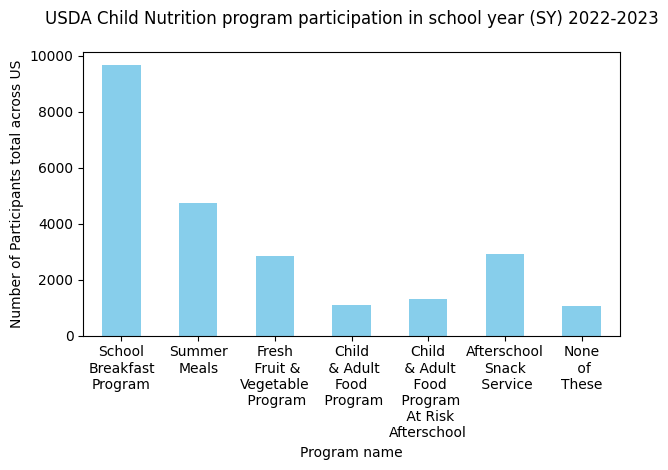

In [237]:
import matplotlib.pyplot as plt

program_names = {
    'Q2C1': 'School\nBreakfast\nProgram',
    'Q2C2': 'Summer\nMeals', 
    'Q2C3': 'Fresh\n Fruit &\nVegetable\n Program', 
    'Q2C4': 'Child\n & Adult\nFood\n Program', 
    'Q2C5': 'Child\n & Adult\n Food\n Program\n At Risk\nAfterschool', 
    'Q2C6': 'Afterschool\nSnack\n Service', 
    'Q2C7': 'None\n of\nThese'
                 }

program_partic = census_df[['Q2C1', 'Q2C2', 'Q2C3', 'Q2C4', 'Q2C5', 'Q2C6', 'Q2C7']].rename(columns=program_names)

program_counts = program_partic.sum() 

program_counts.plot(kind='bar', color='skyblue')
plt.title("USDA Child Nutrition program participation in school year (SY) 2022-2023", pad=20)
plt.xlabel("Program name")
plt.ylabel("Number of Participants total across US") #need to ask about transparency here as one count could be for multiple schools
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

In [238]:
import plotly.express as px
import pandas as pd


program_names = {
    'Q2C1': 'School\nBreakfast\nProgram',
    'Q2C2': 'Summer\nMeals', 
    'Q2C3': 'Fresh\nFruit &\nVegetable\nProgram', 
    'Q2C4': 'Child\n& Adult\nFood\nProgram', 
    'Q2C5': 'Child & Adult\nFood Program\nAt Risk\nAfterschool', 
    'Q2C6': 'Afterschool\nSnack\nService', 
    'Q2C7': 'None\nof\nThese'
}

program_partic = census_df[['Q2C1', 'Q2C2', 'Q2C3', 'Q2C4', 'Q2C5', 'Q2C6', 'Q2C7']].rename(columns=program_names)


program_counts = program_partic.sum().sort_values(ascending=False)


df_plot = program_counts.reset_index()
df_plot.columns = ['Program', 'Participants']


fig = px.bar(
    df_plot,
    x='Program',
    y='Participants',
    text='Participants',          # Show counts on top
    color='Participants',         # Optional: color scale
    color_continuous_scale='Blues'
)


fig.update_layout(
    title="USDA Child Nutrition Program Participation (SY 2022-2023)",
    xaxis_title="Program Name",
    yaxis_title="Number of Participants Across the US",
    xaxis_tickangle=0,            # 0 because labels already broken into lines
    title_x=0.5,                  # Center the title
    font=dict(size=12)
)


fig.update_traces(textposition='outside')

fig.show()



In [239]:
sorted_df = merged_df.sort_values('census_schools', ascending=True)

fig = go.Figure()
fig.add_trace(go.Bar(
    y=sorted_df['census_state'],
    x=sorted_df['census_schools'],
    orientation='h',
    name='Participated',
    marker_color='skyblue'
))
fig.add_trace(go.Bar(
    y=sorted_df['census_state'],
    x=sorted_df['num_schools'] - sorted_df['census_schools'],
    orientation='h',
    name='Not Participated',
    marker_color='lightgray'
))
fig.update_layout(
    barmode='stack',
    title='School Participation in Census by State',
    xaxis_title='Number of Schools',
    yaxis_title='State',
    height=1000,  # Make it scrollable or taller
)
fig.show()

In [ ]:
schools_df #all schools in the US
unique_schools_df # all schools in the US by state

census_df #entire census dataset 
wk_census_df #subset of census df with questions removed, used for the join

merged_df #join of unique schools and wk census
filter_merge_df #removed territories 

Relational Tables

In [245]:
census_df.columns

Index(['CASEID', 'RGN', 'RGN_TXT', 'SFA_NAME', 'SFA_STATE', 'SFA_ZIP',
       'SFA_ID', 'NUM_SCHOOLS', 'NUM_STUDENTS', 'Q2C1',
       ...
       'Q13C6', 'Q13C7', 'Q13C8', 'Q13C9', 'Q13C10', 'Q13C11', 'Q13C12',
       'Q13C13', 'Q13C14', 'na_count_Q'],
      dtype='object', length=121)

Bringing in excel file with question text

In [268]:
data_dict_df = pd.read_excel(r'C:\Users\molly\projects\farm_to_school\data\data_dictionary_f2s.edit.xlsx', sheet_name='Sheet2')

header_df = data_dict_df.iloc[:8]

header_df.head(15)

questions_df = pd.read_excel(r'C:\Users\molly\projects\farm_to_school\data\data_dictionary_f2s.edit.xlsx', sheet_name='Sheet2', header= 9)

questions_df.head(15)



,question_id,question_text,Unnamed: 2
0,Q2C1,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
1,Q2C2,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
2,Q2C3,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
3,Q2C4,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
4,Q2C5,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
5,Q2C6,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
6,Q2C7,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
7,Q5C1,"In SY 2022-23, how did your SFA handle food pr...",0 - NO; 1 - YES
8,Q5C2,"In SY 2022-23, how did your SFA handle food pr...",0 - NO; 1 - YES
9,Q5C3,"In SY 2022-23, how did your SFA handle food pr...",0 - NO; 1 - YES


split the excel into 2 df

In [270]:
questions_df = pd.read_excel(r'C:\Users\molly\projects\farm_to_school\data\data_dictionary_f2s.edit.xlsx', sheet_name='Sheet2', header= 9)

questions_df = questions_df.rename(columns={'Unnamed: 2': 'answer_options'})

questions_df.head(15)



,question_id,question_text,answer_options
0,Q2C1,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
1,Q2C2,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
2,Q2C3,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
3,Q2C4,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
4,Q2C5,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
5,Q2C6,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
6,Q2C7,In addition to the National School Lunch Progr...,0 - NO; 1 - YES
7,Q5C1,"In SY 2022-23, how did your SFA handle food pr...",0 - NO; 1 - YES
8,Q5C2,"In SY 2022-23, how did your SFA handle food pr...",0 - NO; 1 - YES
9,Q5C3,"In SY 2022-23, how did your SFA handle food pr...",0 - NO; 1 - YES


Writing the questions table into SQL

In [ ]:
import sqlite3

conn = sqlite3.connect('../survey.db')

questions_df['id'] = range(1, len(questions_df) + 1) #auto-increment

questions_df = questions_df[['id', 'question_id', 'question_text', 'answer_options']] #adding the id column into the df

questions_df.to_sql("questions",conn, if_exists="replace", index=False) 







116

Creating response table. 

In [ ]:
responses_long = pd.melt( #using melt to reshape, 1 row per answer vs 1 row per case ID
    census_df,
    id_vars=['CASEID'], #keeps this column as is 
    value_vars=q_cols, #this is the column that melts columns to rows
    var_name='question_id', #new melted column name
    value_name='answer'#answer to each question
)

responses_long.insert(0, 'response_id', range(1, len(responses_long) + 1))#adding in responseid column auto-incrementing *primary key

responses_long.to_sql("responses", conn, if_exists="replace", index=False)#creates the table in sql

1250082

In [ ]:
#conn = sqlite3.connect('../')


#case_id = census_df[{'CASEID', 'RGN', 'RGN_TXT', 'SFA_NAME', 'SFA_STATE', 'SFA_ZIP','SFA_ID', 'NUM_SCHOOLS', 'NUM_STUDENTS'}]






NameError: name 'sqlite3' is not defined